# Wedge models

Let's make wedge models!

We're going to make **all sorts of models** using one magical function. Here's what it can do:

- Layer-cake models with no dip.
- Wedge models with arbitrary thickness on the left and right.
- Clinoform models.
- Models filled with arbitrary stratigraphy, from constant values to well logs.

All these models can have varying amounts of rock above and below them, and can be extended left and right beyond the wedgy part. You can also dip the wedge in either direction.

**This is a new feature introduced in v0.4.2; if you find bugs, please let us know by [raising an issue](https://github.com/agile-geoscience/bruges/issues).**

---

## The default model and a basic synthetic workflow

We can produce a simple wedge model just by calling the function.

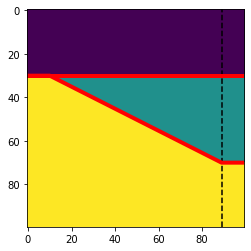

In [1]:
import matplotlib.pyplot as plt
import bruges as bg

w, top, base, ref = bg.models.wedge()

plt.imshow(w, interpolation='none')
plt.axvline(ref, color='k', ls='--')
plt.plot(top, 'r-', lw=4)
plt.plot(base, 'r-', lw=4)
plt.show()

The function returns the following:
    
- `w`: the model array.
- `top`: a 1D array containing the index of the wedge top at each trace.
- `base`: a 1D array containing the index of the wedge bottom at each trace.
- `ref`: the number of the trace with a reference thickness of 1. This is only really useful if you're making the wedge from well data (See below).

The array contains only the integers 0, 1, 2 by default, but you can easily change this. Let's see how...

## Alternative workflow

In the last example, we made an array of integers, then used indexing to place rock properties in the array, using the index as a sort of look-up.

But we could make the impedance model directly, passing rock properties in to the `wedge()` function via teh `strat` argument. It just depends how you want to make your models. 

The `strat` argument was the default `[0, 1, 2]` in the last example. Let's pass in the rock properties instead. 

In [2]:
import numpy as np

vps = np.array([2320, 2350, 2350])
rhos = np.array([2650, 2600, 2620])

impedances = vps * rhos

w, top, base, ref = bg.models.wedge(strat=impedances)

And look at the result:

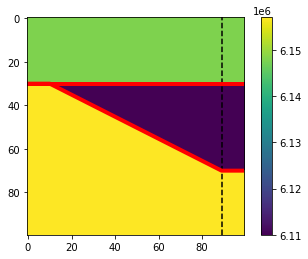

In [3]:
plt.imshow(w, interpolation='none') 
plt.axvline(ref, color='k', ls='--')
plt.plot(top, 'r-', lw=4)
plt.plot(base, 'r-', lw=4)
plt.colorbar()
plt.show()

Now the wedge contains rock properties, not integer labels.

---

## A layered wedge model

We can modify the stratigraphy of any layer. E.g., let's pass `(1, 2, 1, 2, 1)` in as the wedge strat, instead of just `1`. We'll also change the bottom layer to a `3`, so now we have 4 rocks.

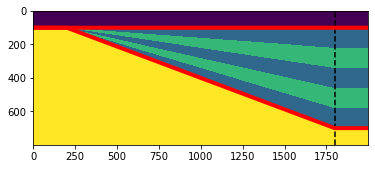

In [2]:
w, top, base, ref = bg.models.wedge(depth=(100, 600, 100),
                                    width=(200, 1600, 200),
                                    strat=(0, (1, 2, 1, 2, 1), 3),
                                    mode='linear'
                                    )

plt.imshow(w, interpolation='none')
plt.axvline(ref, color='k', ls='--')
plt.plot(top, 'r-', lw=4)
plt.plot(base, 'r-', lw=4)
plt.show()

Notice that the `wedge` function returns 4 things:

- The wedge model as a 2D NumPy array of ints (or whatever numbers you gave as input).
- The top horizon, in pixel index units, for convenience.
- The base horizon, in pixel index units, for convenience.
- The horizontal (left-right) position, as an integer, of the 'reference' model. You may or may not be interested in this, depending on your application.

If you only want the wedge, you can call the function like so:

    wedge, *_ = bg.models.wedge()

---

## A layer-cake model

You can provide the minimum and maximum thickness of the wedge.

**Note:** If the maximum thickness of the wedge if more than 1, then the total depth (i.e. number of rows) of the model will be more than the sum of the `depth` argument, so that the entire model can be accommodated. If you don't want the 'extra' depth, you can slice them off the model as with any NumPy array.

Here's a layer cake:

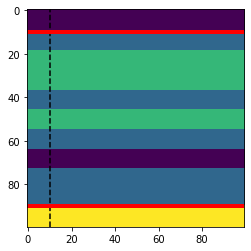

In [5]:
w, top, base, ref = bg.models.wedge(depth=(10., 80, 10),
                                    width=(10, 80, 10),
                                    strat=(0, (1, 2, 2, 1, 2, 1, 0, 1, 1,), 3),  # Floats in the wedge
                                    thickness=(1, 1),
                                    mode='linear',
                                    )

plt.imshow(w, interpolation='none')
plt.axvline(ref, color='k', ls='--')
plt.plot(top, 'r-', lw=4)
plt.plot(base, 'r-', lw=4)
plt.show()

Here's another example. We can reverse the wedge direction by passing in (1, 0.5) for the thickess. As a result, the left-hand-side is the maximum thickness of 1, the right is half the thickness.

This time we'll also pass in floats — velocities perhaps.

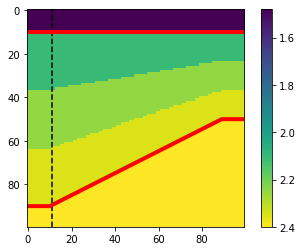

In [6]:
w, top, base, ref = bg.models.wedge(depth=(10., 80, 10),
                                    width=(10, 80, 10),
                                    strat=(1.48, (2.10, 2.25, 2.35), 2.40),  # Floats in the wedge.
                                    thickness=(1, 0.5),
                                    mode='linear',
                                    )

plt.imshow(w, interpolation='none')
plt.axvline(ref, color='k', ls='--')
plt.plot(top, 'r-', lw=4)
plt.plot(base, 'r-', lw=4)
cb = plt.colorbar()
cb.ax.invert_yaxis()
plt.show()

---

## Top and bottom conformance

The layers in the wedge can also be top or bottom conforming, rather than proportionally adjusted.

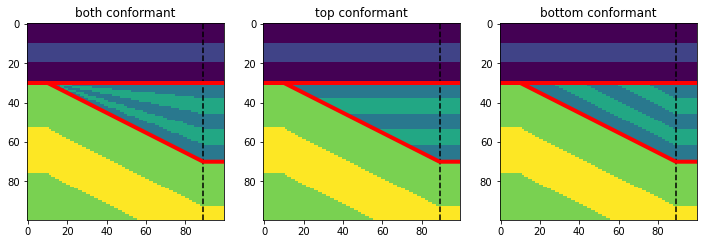

In [7]:
confs = ['both', 'top', 'bottom']

fig, axs = plt.subplots(ncols=len(confs), figsize=(12, 4))
for ax, conf in zip(axs, confs):
    w, top, base, ref = bg.models.wedge(strat=((0, 1, 0), (2, 3, 2, 3, 2), (4, 5, 4)),
                                        conformance=conf)
    ax.imshow(w, interpolation='none')
    ax.axvline(ref, color='k', ls='--')
    ax.plot(top, 'r-', lw=4)
    ax.plot(base, 'r-', lw=4)
    ax.set_title(f"{conf} conformant")
plt.show()

---

## Different 'wedge' shapes

The linear wedge is familiar, but you can also have other shapes (`power` and `root` were new in v0.4.3):

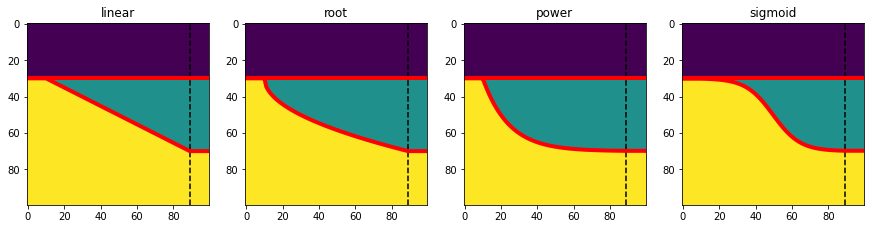

In [8]:
modes = ['linear', 'root', 'power', 'sigmoid']

fig, axs = plt.subplots(ncols=len(modes), figsize=(15, 5))
for ax, mode in zip(axs, modes):
    w, top, base, ref = bg.models.wedge(mode=mode)
    ax.imshow(w, interpolation='none')
    ax.axvline(ref, color='k', ls='--')
    ax.plot(top, 'r-', lw=4)
    ax.plot(base, 'r-', lw=4)
    ax.set_title(mode)
plt.show()

If you're feeling creative, you can also give `wedge()` your own function (since version 0.4.3). Your function should have an API like `np.linspace()` (the function that produces the standard wedge shape). Here's an example:

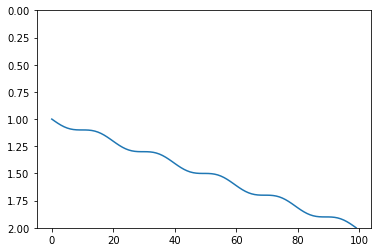

In [9]:
def wavy(start, stop, num):
    """
    Custom wedge shape.
    """
    x = np.linspace(0, 10*np.pi, num)
    y = np.sin(x) + x
    
    # Normalize to 0-1.
    y_ = (y - np.min(y)) / (np.max(y)-np.min(y))
    
    # Scale to required output.
    return min(start, stop) + abs(stop-start) * y_


# The wedge function will pass 'left' and 'right' thicknesses.
# You only need to worry about the case where left < right.
left, right = 1, 2
y = wavy(left, right, 100)

plt.plot(y)
plt.ylim(right, 0)
plt.show()

Let's use that function to make a model:

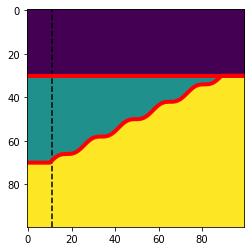

In [10]:
w, top, base, ref = bg.models.wedge(mode=wavy, thickness=(1, 0))

plt.imshow(w, interpolation='none')
plt.axvline(ref, color='k', ls='--')
plt.plot(top, 'r-', lw=4)
plt.plot(base, 'r-', lw=4)
plt.show()

---

## Varying net:gross across `breadth`

**This is a new feature introduced in v0.4.3; if you find bugs, please let us know by [raising an issue](https://github.com/agile-geoscience/bruges/issues).**

If you define a **binary wedge** — i.e. exactly 2 lithologies in the wedge layer — then you can pass a `breadth` argument to get a 3D model. The new dimension contains the 2 pure litholgies at each end, and pinches them out across the model's 'breadth'. Now the top and base are 2D arrays (surfaces through the wedge volume), while `ref` is still a scalar (the lateral position of the reference 'trace').

In [11]:
w, top, base, ref = bg.models.wedge(strat=(0, (1, 2, 1, 1, 2, 1), 3),  # Binary wedge.
                                    breadth=100)

w.shape, top.shape, base.shape, ref

((100, 100, 100), (100, 100), (100, 100), 89)

Let's look at 3 slices: one from one end of the 'net:gross' axis (the last axis), one from the other end (right hand image), and one from halfway (middle image). These are the net:gross end-members.

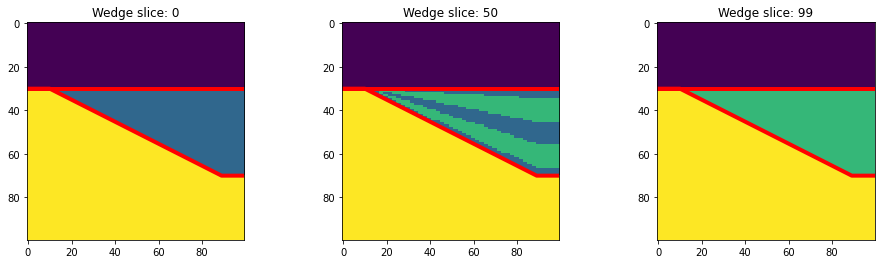

In [12]:
slices = [0, 50, 99]

fig, axs = plt.subplots(ncols=len(slices), figsize=(16, 4))
for ax, slic in zip(axs, slices):
    ax.imshow(w[..., slic], interpolation='none')
    ax.plot(top[:, slic], 'r-', lw=4)
    ax.plot(base[:, slic], 'r-', lw=4)
    ax.set_title(f"Wedge slice: {slic}")
plt.show()

Slices in/out of the page, look like this:

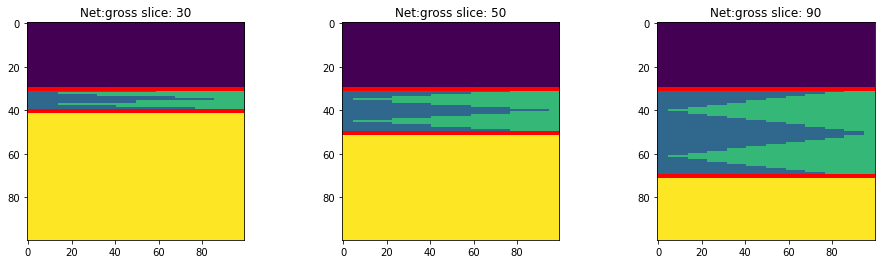

In [13]:
slices = [30, 50, 90]

fig, axs = plt.subplots(ncols=len(slices), figsize=(16, 4))
for ax, slic in zip(axs, slices):
    ax.imshow(w[:, slic], interpolation='none')
    ax.plot(top[slic], 'r-', lw=4)
    ax.plot(base[slic], 'r-', lw=4)
    ax.set_title(f"Net:gross slice: {slic}")
plt.show()

Let's simulate the seismic. We'll provide 4 'rocks', one for each of the integers in the array:

In [14]:
vps = np.array([2320, 2350, 2350, 2370])
rhos = np.array([2650, 2600, 2620, 2610])

vp = vps[w]
rho = rhos[w]

rc = bg.reflection.acoustic_reflectivity(vp, rho)

We can check the reflectivities on a vertical slice half-way through the 'breadth':

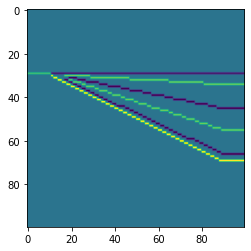

In [15]:
plt.imshow(rc[:, :, 50])

Now we can convolve with a wavelet to get a synthetic. The synthetic will, like the RC series, be three-dimensional:

In [17]:
ricker, t = bg.filters.ricker(duration=0.064, dt=0.001, f=40)

syn = bg.filters.convolve(rc, ricker, axis=0)  # Time is on the first axis.
syn.shape

(100, 100, 100)

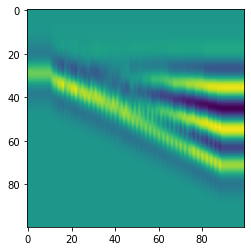

In [18]:
plt.imshow(syn[:, :, 50])

Let's look at the three orthognal profiles through this synthetic:

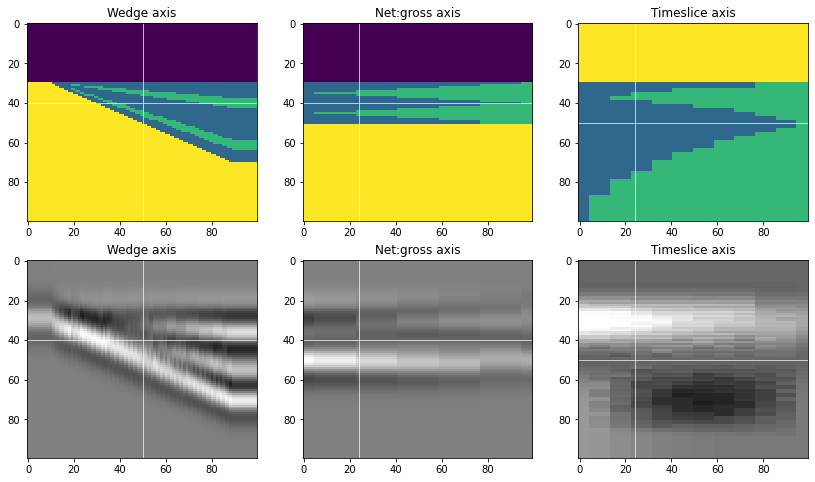

In [19]:
ma = np.percentile(syn, 99.9)
vols, cmaps = [w, syn], ['viridis', 'gray']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))
for row, vol, cm in zip(axs, vols, cmaps):
    row[0].imshow(vol[:, :, 24], aspect='auto', interpolation='none', cmap=cm, vmin=-ma if vol is syn else None, vmax=ma if vol is syn else None)
    row[0].axhline(40, c='w', lw=0.67)
    row[0].axvline(50, c='w', lw=0.67)
    row[0].set_title(f"Wedge axis")
    row[1].imshow(vol[:, 50, :], aspect='auto', interpolation='none', cmap=cm, vmin=-ma if vol is syn else None, vmax=ma if vol is syn else None)
    row[1].axhline(40, c='w', lw=0.67)
    row[1].axvline(24, c='w', lw=0.67)
    row[1].set_title(f"Net:gross axis")
    row[2].imshow(vol[40, :, :], aspect='auto', interpolation='none', cmap=cm, vmin=0 if vol is w else -ma, vmax=ma if vol is syn else None)
    row[2].axhline(50, c='w', lw=0.67)
    row[2].axvline(24, c='w', lw=0.67)
    row[2].set_title(f"Timeslice axis")
plt.show()

---

## Models from well logs

We can pass in arrays as `strat` and they will be used as the values in the model layers.

We'll start by loading a CSV file of a well log and dissecting it into three zones that we can pass in as `strat`. [Welly](https://code.agilescientific.com/welly/) would but useful for this, but we can also select these segments using conditions on the key depth boundaries.

Well load the well log as a 2D numpy array, and then pull out the `depths`, p-sonic (slowness) `dt`, and density `rhob`:

In [20]:
log_data = np.loadtxt('../data/P-129.csv', delimiter=',', skiprows=1)
depths, dt, rhob = log_data[:, 0], log_data[:, 2], log_data[:, 4]

And calculate an acoustic impedance log as input into our model:

In [21]:
impedance = (1e6 / dt) * rhob

And now we can segment this array into upper, middle, and lower segments.

In [22]:
datum, top, base, floor = 500, 701, 805, 1005 

log_upper = impedance[(depths >= datum) & (depths < top)]
log_wedge = impedance[(depths >= top) & (depths < base)]
log_lower = impedance[(depths >= base) & (depths < floor)]

We'll create arrays of depths for the corresponding zones as well:

In [23]:
upper_depths = depths[(depths >= datum) & (depths < top)]
wedge_depths = depths[(depths >= top) & (depths < base)]
lower_depths = depths[(depths >= base) & (depths < floor)]

A quick plot of the three zones shows us the stratigraphic inputs to the `wedge` function.

(1005.0, 500.0)

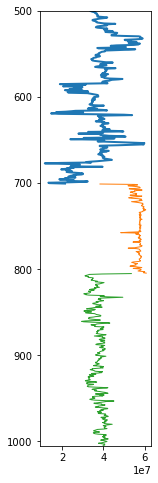

In [24]:
plt.figure(figsize=(2, 8))
plt.plot(log_upper, upper_depths, lw=2)
plt.plot(log_wedge, wedge_depths, lw=1)
plt.plot(log_lower, lower_depths, lw=1)
plt.ylim(floor, datum)

The middle piece (orange) will be fitted to the middle layer of the wedge (resulting in the number of pixels given in the `depth` argument. The upper (blue) and lower (green) pieces will then be cropped to fit their layers, so you must provide enough data for this to happen. The safest thing to do is to provide the _entire_ log above and the same below.

Now we can send these pieces to `wedge`. At the reference location `ref`, it will squeeze all of `log_upper` array into the 400 samples allocated to the upper layer, `log_wedge` will be squeezed into 208 samples in wedge layer, and `log_lower` will be squeezed into 400 samples in lower layer. We've chosen these depth sizes to be proportional to the the thicknesses of these three zones. This is not a requirement however, it simply prevents distorting the individual segments at the reference trace.

In [25]:
w, top, base, ref = bg.models.wedge(depth=(400, 208, 400),
                                    width=(20, 260, 20),
                                    strat=(log_upper, log_wedge, log_lower),
                                    mode='sigmoid', conformance='bottom',
                                    thickness=(0, 2)
                                    )

In [26]:
log = w[:, ref]

# Make a scaled version of the log for the section plot.
log_ = (log - np.mean(log)) / np.std(log)
depth = np.arange(len(log))
sf = 2.5
log_bias = np.ptp(log_)

Now we can plot everything together:

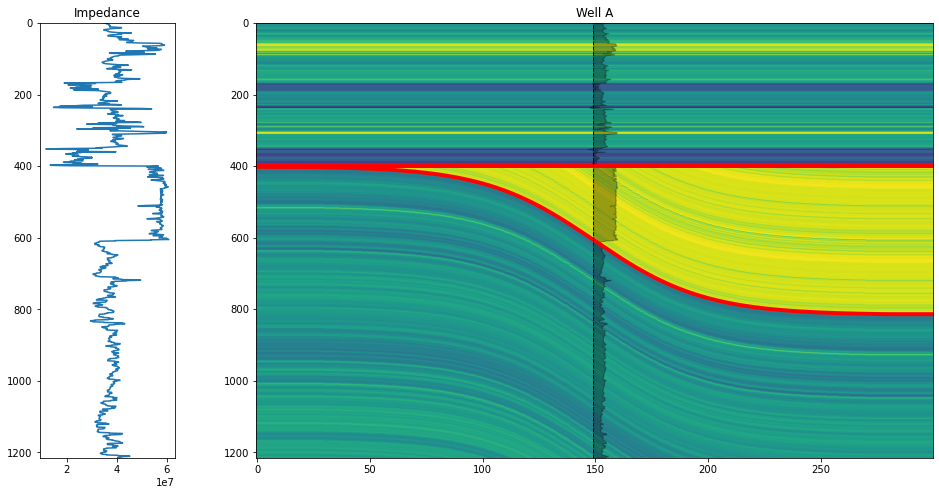

In [27]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=2, gridspec_kw={'width_ratios': (1, 5)})

axs[0].plot(log, depth)
axs[0].set_ylim(depth[-1], depth[0])
axs[0].set_title('Impedance')

im=axs[1].imshow(w, aspect='auto', cmap='viridis')
axs[1].plot(top, 'r-', lw=4)
axs[1].plot(base, 'r-', lw=4)
axs[1].fill_betweenx(depth, ref + log_bias + (sf*log_), ref, color='k', alpha=0.3)
# axs[1].plot(ref + log_bias + (sf*log), depth, c='k', lw=1)
axs[1].axvline(ref, color='k', ls='--', lw=1)
axs[1].set_title('Well A')

plt.show()

Now we can use this highly detailed rock property model for any seismic simulations you may want to do.

---
&copy; 2022 Agile Scientific, licensed CC-BY / Apache 2.0